In [327]:
import os
os.system("pip3 install opencv-contrib-python")
os.system("pip3 install matplotlib")
os.system("pip3 install scikit-learn")
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [328]:
class Image:
    def __init__(self):
        self.img=""
    def read_local_img(self,path,val=0):
        self.img = cv2.imread(path)
        if(val==0):
            self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    def bgr_to_rgb(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
    def grayscale(self):
        self.img = cv2.imread(self.img, cmap="gray")
    def print_img(self,fig_size=[0,0],axis_bool=False):
        if fig_size != [0,0]:
            plt.figure(figsize = [fig_size[0],fig_size[1]])
        plt.imshow(self.img)
        if(axis_bool==False):
            plt.axis('off')
        plt.show()


In [329]:
class Subplot:
    def __init__(self):
        self.x=1
        self.y=1
        self.fig=[16,16]
        self.arr=1
        self.tot=1
        self.tit=[]

    def print_img_subplot(self,x,y,fi,tot,arr,tit,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        self.tit=tit
        fig = plt.figure(figsize=(self.fig[0],self.fig[0]))
        for i in range(0,self.tot):
            ax = fig.add_subplot(self.x,self.y,1+i)
            ax.imshow(arr[i])
            ax.title.set_text(self.tit[i])
            if(axis_bool==False):
                ax.axis('off')

    def print_img_subplot2(self,x,y,fi,tot,arr,axis_bool=False):
        self.x=x
        self.y=y
        self.fig=fi
        self.arr=arr
        self.tot=tot
        f, axarr = plt.subplots(x,y)
        for i in range(0,tot):
            axarr[i//x,i%y].imshow(arr[i])


# Question 1

### part 1

a)

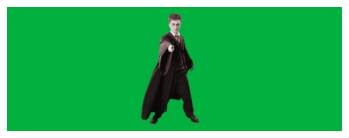

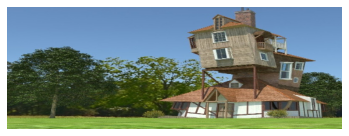

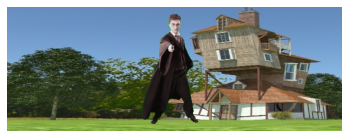

In [330]:
def green_screen_magic(img1,img2):
    arr=np.zeros((img1.shape[0],img1.shape[1],3),dtype=np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if(img1[i][j][0]<100 and img1[i][j][1]>80 and img1[i][j][2]<100):
                arr[i][j]=img2[i][j]
            else:
                arr[i][j]=img1[i][j]
    return arr

fg=Image()
fg.read_local_img('../images/fg.jpg')
fg.print_img()

bg=Image()
bg.read_local_img('../images/bg.jpg')
bg.img=cv2.resize(bg.img,(576,210))
bg.print_img()

final_img=Image()
final_img.img=green_screen_magic(fg.img,bg.img)
final_img.print_img()


b)

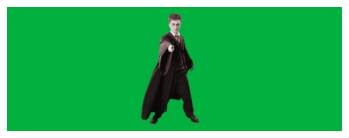

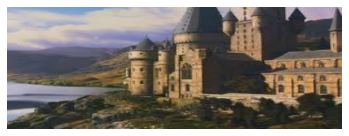

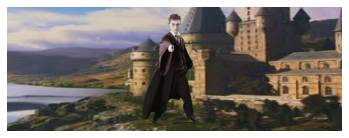

In [331]:
fg=Image()
fg.read_local_img('../images/fg.jpg')
fg.print_img()

bg=Image()
bg.read_local_img('../images/hog.jpg')
bg.img=cv2.resize(bg.img,(576,210))
bg.print_img()

final_img=Image()
final_img.img=green_screen_magic(fg.img,bg.img)
final_img.print_img()

c)

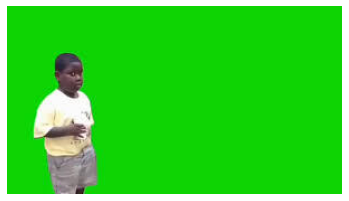

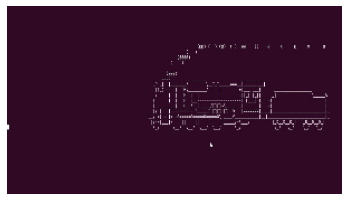

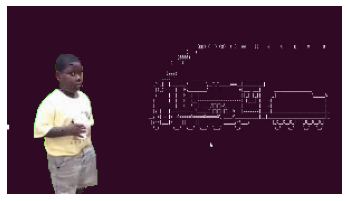

In [332]:
fg=Image()
fg.read_local_img('../images/fg1.jpg')
fg.print_img()

bg=Image()
bg.read_local_img('../images/bg1.jpg')
bg.img=cv2.resize(bg.img,(fg.img.shape[1],fg.img.shape[0]))
bg.print_img()

final_img=Image()
final_img.img=green_screen_magic(fg.img,bg.img)
final_img.print_img()

### part 2
+ dimensstion of img = 720*576
+ given img are standard so each pixel consits 3*8 bits
+ number of images stored are = 2GB/(720*576*3 Bytes)

In [333]:
total_disk_size_in_bytes = 2 * 1024 * 1024 * 1024
total_image_size_in_bytes = 720*576*3
number_of_images = total_disk_size_in_bytes // total_image_size_in_bytes
print("Number of Images on 2GB disk : "+str(number_of_images))

Number of Images on 2GB disk : 1726


# Question 2



+ Let the dimenssion of image is nxn
+ Bytes for 1 img = 3*n*n
+ total_disk_size_in_bytes = 500*1024*1024
+ number_of_images = 200
+ requried ans = floor(sqrt(total_disk_size_in_bytes/(3*number_of_images)))
+ ANSWER = 934

In [334]:
total_disk_size_in_bytes = 500*1024*1024
number_of_images = 200
n = math.floor(math.sqrt ( total_disk_size_in_bytes / ( 3*number_of_images )))
print(n)

934


# Question3

i am using 2 equations here
1. lens formula 
    ```
        1/f=1/u+1/v
    ```
2. magnification
    ```
        m = u/v=h/H
    ```

<img src="../images/3.jpeg" width=400 />

given 
+ f=43.5cm
+ v=240m
+ h=390*10mm = 3.9cm

+ by equation 1 
    + u=43.5789cm
+ by equation 2
    + H/3.9=24000/43.5789
    + H = 3.9cm(24000/43.5789)
    + H = 2147.828cm or 2.147m

# Question 4

## Part 1

In [335]:
def bitQuantizeImage(im,k):
    arr=np.zeros((im.shape[0],im.shape[1],3),dtype=np.uint8)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            for o in range(im.shape[2]):
                arr[i][j][o]= (2**(8-k))*math.floor((2**(k-8))*im[i][j][o])
    return arr

def bitPlaneImage(img,g):
    gg=2**g
    arr=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                arr[i][j][k]=img[i][j][k]%gg
    return arr

def cmp_img(img1,img2):
    arr=np.zeros((img1.shape[0],img1.shape[1],3),dtype=np.uint8)
    if(img1.shape[0]!=img2.shape[0] or img1.shape[1]!=img2.shape[1] or img1.shape[2]!=img2.shape[2]):
        return False
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            for o in range(img1.shape[2]):
                # arr[i][j][o]=img2[i][j][o]-img1[i][j][o]
                if (img1[i][j][o]!=img2[i][j][o]):
                    return False
    return True

## Part 2

Flinch quntaized to 8 bits


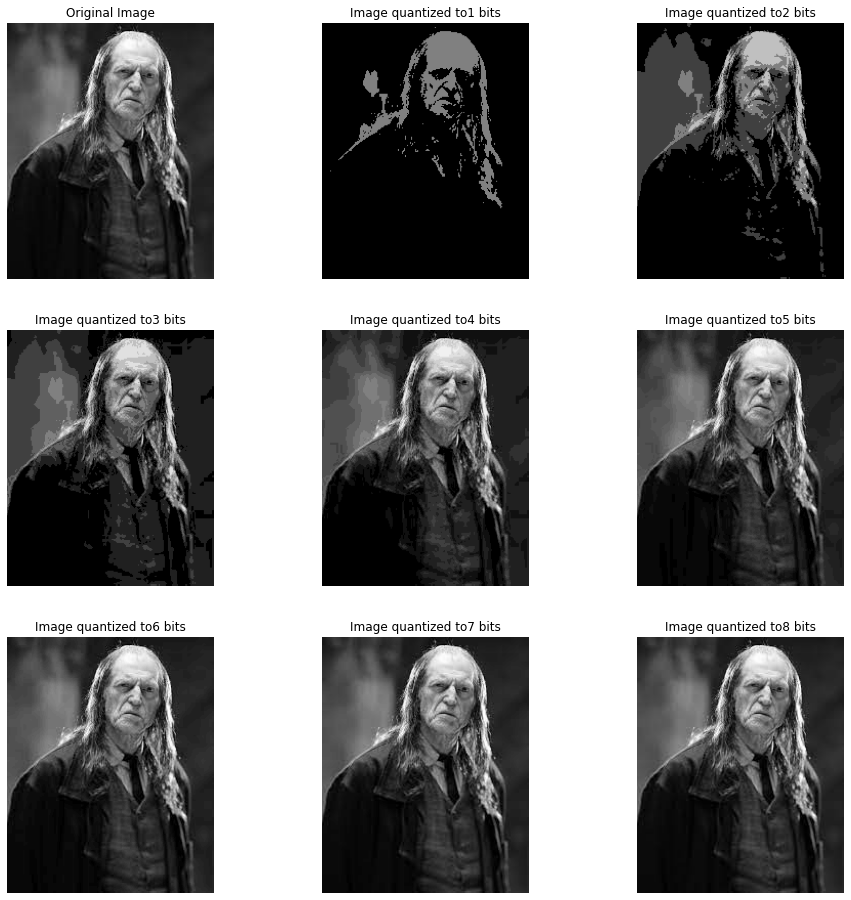

In [336]:
flinch=Image()
flinch.read_local_img('../images/filch.jpg')

print("Flinch quntaized to 8 bits")
ck=[]
dk=[]
bit_quanta = Subplot()
ck.append(flinch.img)
dk.append("Original Image")
for i in range(1,9):
    ck.append(bitQuantizeImage(flinch.img,i))
    dk.append("Image quantized to"+str(i)+" bits")
bit_quanta.print_img_subplot(3,3,[16,16],9,ck,dk,False)

## Part 3

Hermoine images in 8 bit plane


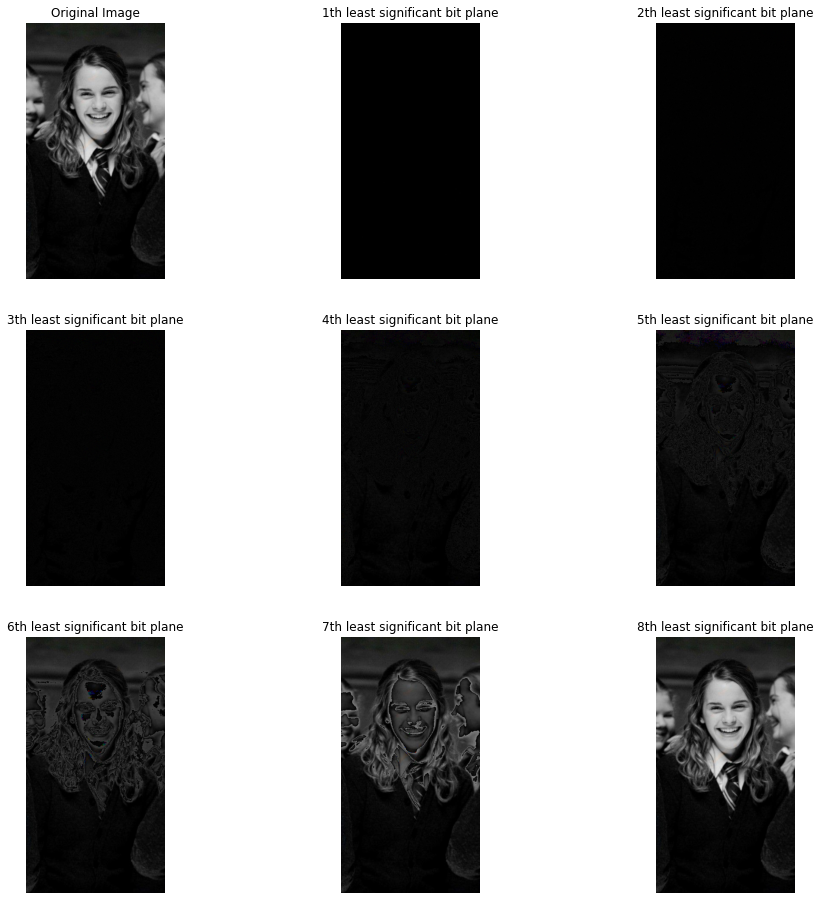

In [337]:
hermoine=Image()
hermoine.read_local_img('../images/hermoine.jpg')

print("Hermoine images in 8 bit plane")
ck=[]
dk=[]
bit_plane = Subplot()
ck.append(hermoine.img)
dk.append("Original Image")
for i in range(1,9):
    ck.append(bitPlaneImage(hermoine.img,i))
    dk.append(str(i)+"th least significant bit plane")
bit_plane.print_img_subplot(3,3,[16,16],9,ck,dk,False)

## Part 4

In [338]:
luna=Image()
luna.read_local_img('../images/luna.jpg')
luna_corrupt=Image()
luna_corrupt.read_local_img('../images/luna_corrupt.jpg')

# luna.print_img()
# luna_corrupt.print_img()


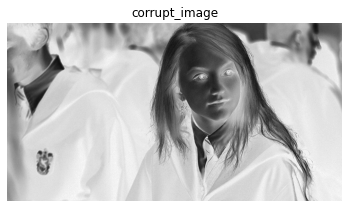

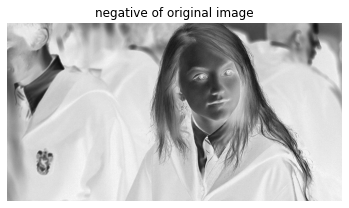

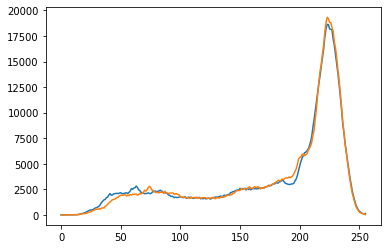

In [339]:
def clip(a):
    if(int(a)>255):
        return 255
    if(int(a)<0):
        return 0
    else:
        return int(a)

def linear_tranform(img,k1,k2):
    arr=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                arr[i][j][k]=clip(k2+k1*img[i][j][k])
    return arr

my_luna=Image()
my_luna.img=cv2.cvtColor(luna.img, cv2.COLOR_BGR2GRAY)
plt.imshow(my_luna.img,cmap='gray')

my_luna_cd=Image()
my_luna_cd.img=cv2.cvtColor(luna_corrupt.img, cv2.COLOR_BGR2GRAY)
plt.imshow(my_luna_cd.img,cmap='gray')
plt.axis('off')
# plt.savefig('../images/1.jpg')
plt.title("corrupt_image")

plt.show()

img1=linear_tranform(luna.img,-1,255)
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')
plt.axis('off')
# plt.savefig('../images/2.jpg')
plt.title("negative of original image")
plt.show()

def my_histogram(img,val=1):
    arr=np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            arr[img[i][j]]+=1
    return arr
    
plt.plot(np.arange(256),my_histogram(my_luna_cd.img))

plt.plot(np.arange(256),my_histogram(img1))
plt.show()





### my looking this image i can guess this image is corrupted as image negative but historam doesn't replicate that may be there is some noise in image which not letting me to conclude a perfect function like linear tranformation or gamma transformation

# Question5


### part 1

In [340]:
def linContrastStretching(im,a,b):
    mini=255
    maxi=0
    arr=np.zeros((im.shape[0],im.shape[1],3),dtype=np.uint8)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            for k in range(im.shape[2]):
                mini=min(mini,im[i][j][k])
                maxi=max(maxi,im[i][j][k])
    c=(b-a)/(maxi-mini)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            for k in range(im.shape[2]):
                arr[i][j][k]=clip(c*(im[i][j][k]-mini)+a)
    return arr

### part 2

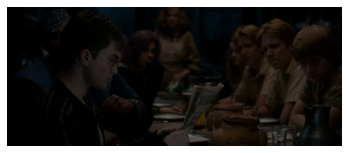

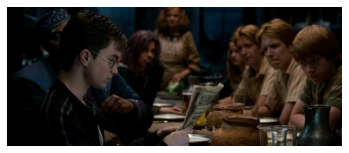

In [341]:
phoenix=Image()
phoenix.read_local_img('../images/phoenix-bad.jpg')
phoenix.print_img()

temp=Image()
temp.img = linContrastStretching(phoenix.img,0,255)
temp.print_img()

### part 3

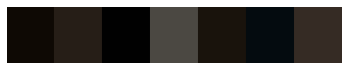

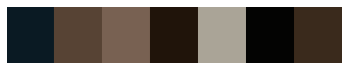

In [342]:

def color_bar(img,k):
    clt=KMeans(n_clusters=k)
    img = clt.fit(img.reshape(-1, 3))
    img=color_bar_helper(img)
    return img

def color_bar_helper(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

bar1=Image()
bar1.img=color_bar(phoenix.img,7)
bar1.print_img()
bar2=Image()
bar2.img=color_bar(temp.img,7)
bar2.print_img()


### part4

#### Description 
+ For the image given its min pixel val = 0 and max pixel val = 112 which can be interpreted as darker image(observable too) so i just make max pixel = 255 and min is same as 0 by using a simple linear function `T(r)= m(r-min)+c`, where `m =(max_new-min_new)/(max-min)` and `c = min_new`. 
+ So now all pixel are dispered in range of [0,255] from [0,112]
+ we can ignore 3% of values from both min and max side for getting better results but since it works without it i use sime linear stretching


# Question6

part 1

In [343]:

def piecewiseLinTransform(aar,img,k1,k2,a,b,val=True):
    arr=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    arr=img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                if(img[i][j][k]<=255*b and img[i][j][k]>=255*a and (aar[i][j][k]==0 or val==True)):
                    arr[i][j][k]=clip(math.floor(k2*255+k1*img[i][j][k]))
                    aar[i][j][k]=1
    return arr,aar

snape1=Image()
snape1.read_local_img('../images/snape1.jpg')

hagrid=Image()
hagrid.read_local_img('../images/hagrid.jpg')

part 2

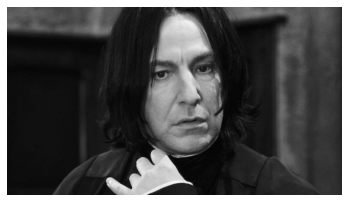

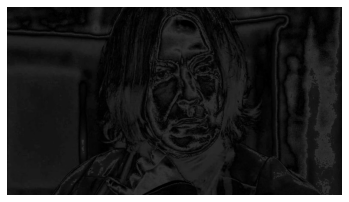

In [344]:
snape1.print_img()
aar=np.zeros((snape1.img.shape[0],snape1.img.shape[1],3),dtype=np.uint8)
snape1_function=[[1,0.5,0.0,0.2],[-2,0.6,0.2,0.3],[1,-0.3,0.3,0.5],[-2,1.2,0.5,0.6],[1,-0.6,0.6,0.8],[-2,1.8,0.8,1.0]]
for i in range(len(snape1_function)):
    snape1.img,aar=piecewiseLinTransform(aar,snape1.img,snape1_function[i][0],snape1_function[i][1],snape1_function[i][2],snape1_function[i][3])
snape1.print_img()


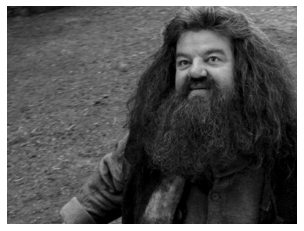

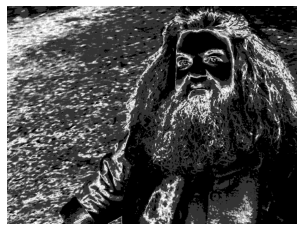

In [345]:
hagrid.print_img()
aar=np.zeros((hagrid.img.shape[0],hagrid.img.shape[1],3),dtype=np.uint8)
hagrid_function=[[0,0,0.0,0.1],[0,0.2,0.1,0.2],[7,-1,0.2,0.3],[-7,3,0.3,0.4],[0,0.2,0.4,0.5],[0,0,0.5,1.0]]
for i in range(len(hagrid_function)):
    hagrid.img,aar=piecewiseLinTransform(aar,hagrid.img,hagrid_function[i][0],hagrid_function[i][1],hagrid_function[i][2],hagrid_function[i][3],False)
hagrid.print_img()

part3

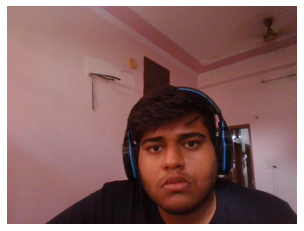

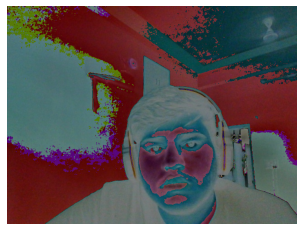

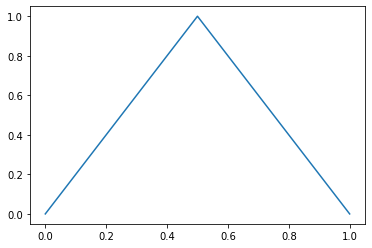

In [346]:
myImg = Image()
myImg.read_local_img('../images/myImg.jpg')
myImg.print_img()

arry=[0,1,0]
arrx=[0,0.5,1]
my_fun=[[1,0.5,0,0.5],[-1,1,0.5,1]]

aar=np.zeros((myImg.img.shape[0],myImg.img.shape[1],3),dtype=np.uint8)
for i in range(len(my_fun)):
    myImg.img,aar=piecewiseLinTransform(aar,myImg.img,my_fun[i][0],my_fun[i][1],my_fun[i][2],my_fun[i][3])
myImg.print_img()
plt.plot(arrx,arry)
plt.show()

### Description
+ a array contains the information of piecewise linear transformation function and iterating over it along with keeping track of transformed data i transform the unchanged pixel till loop fineshes and then you get the desired results.
+ in piecewiseLinTransform function i traverse whole imgae in search to target pixel and transform it to new value.

# Question7

### part 1

In [347]:
class Hist:
    def __init__(self,img):
        self.img=img
        self.count_arr=[]
        self.npdf=[]
        self.ncdp=[]
        self.ii=np.arange(256)
        self.img2=self.cp()
        self.count_arr2=[]
        self.npdf2=[]
        self.ncdp2=[]
        
    def cp(self):
        arr=np.zeros((self.img.shape[0],self.img.shape[1],3),dtype=np.uint8)
        for i in range(self.img.shape[0]):
            for j in range(self.img.shape[1]):
                for k in range(self.img.shape[2]):
                    arr[i][j][k]=self.img[i][j][k]
        return arr
        
    def my_histogram(self,val=1):
        arr=np.zeros(256)
        if val==1:
            for i in range(self.img.shape[0]):
                for j in range(self.img.shape[1]):
                    arr[self.img[i][j]]+=1
            self.count_arr=arr
        else:
            for i in range(self.img2.shape[0]):
                for j in range(self.img2.shape[1]):
                    arr[self.img2[i][j]]+=1
            self.count_arr2=arr

    def histEqaulization_2helper(self):
        for i in range(self.img2.shape[0]):
            for j in range(self.img2.shape[1]):
                cc=self.ncdf[self.img2[i][j]]
                cc= 255*cc
                self.img2[i][j]=cc
                np.clip(self.img2[i][j],0,255)
        self.img2=self.img2.astype(np.uint8)

    def histEqaulization_1helper(self,val=1):
        if val==1:
            self.my_histogram()
            arr=np.zeros(256)
            hist=self.count_arr
            arr[0]=hist[0]
            for i in range(1,256):
                arr[i]=hist[i]+arr[i-1]
            hh=max(hist)
            aa=max(arr)
            for i in range(0,256):
                hist[i]=hist[i]/hh
                arr[i]=arr[i]/aa
            self.npdf=hist
            self.ncdf=arr
        else :
            self.my_histogram(2)
            arr=np.zeros(256)
            hist=self.count_arr2
            
            arr[0]=hist[0]
            for i in range(1,256):
                arr[i]=hist[i]+arr[i-1]
            aa=max(arr)
            for i in range(0,256):
                hist[i]=hist[i]/aa
                arr[i]=arr[i]/aa
            self.npdf2=hist
            self.ncdf2=arr
        
    def histEqaulization(self):
        self.histEqaulization_1helper()
        self.histEqaulization_2helper()
        
    def print_4(self):
        self.histEqaulization_1helper(2)
        fig = plt.figure(figsize=(16,16))
        
        ax1 = fig.add_subplot(221)
        ax1.imshow(self.img)
        ax1.axis('off')
        ax1.title.set_text("Original Image")
        
        ax2 = fig.add_subplot(222)
        ax2.bar(self.ii,self.npdf)
        ax2.plot(self.ii,self.ncdf)
        ax2.title.set_text("PDF and CDF plot of original Image")
        
        ax3 = fig.add_subplot(223)
        ax3.imshow(self.img2)
        ax3.axis('off')
        ax3.title.set_text("Equalized Image")
        
        ax4 = fig.add_subplot(224)
        ax4.bar(self.ii,self.npdf2)
        ax4.plot(self.ii,self.ncdf2)
        ax4.title.set_text("PDF and CDF plot of Equalized Image")
        
        plt.show()


### part2

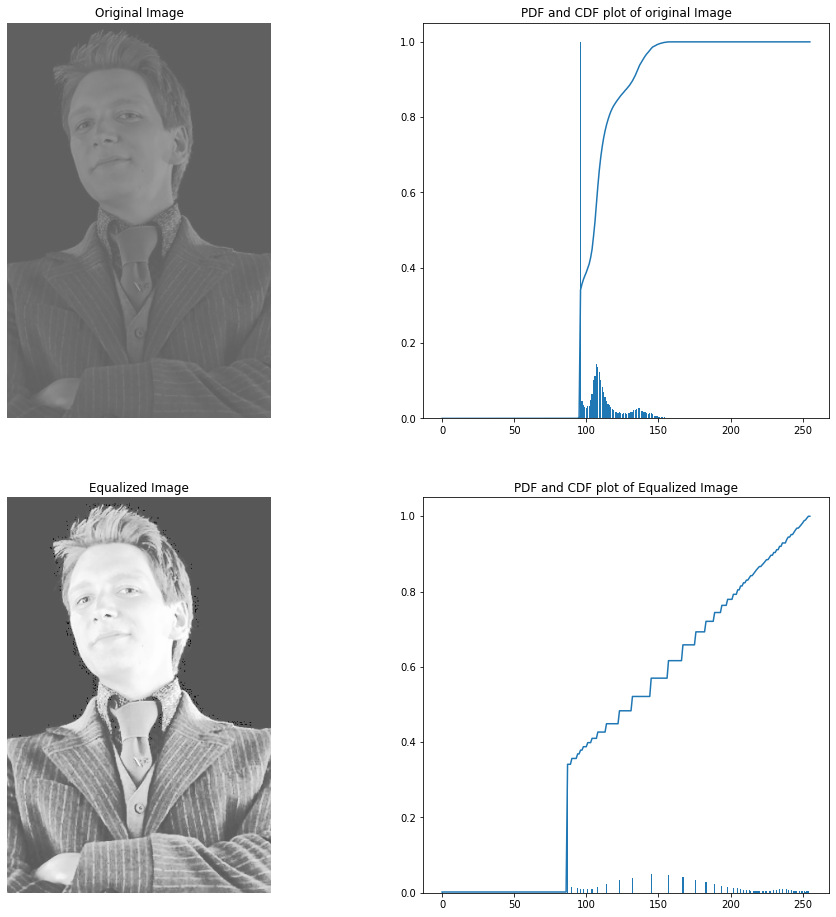

In [348]:
fred=Image()
fred.read_local_img('../images/fred.jpeg')
img=fred.img
FRED=Hist(img)
FRED.histEqaulization()
FRED.print_4()


### part3

In [349]:
def cdf(img):
    arr=[0]*256
    ck=[]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            arr[img[i][j]]+=1
    for i in range(1,256):
        arr[i]+=arr[i-1]
    for i in range(256):
        ck.append(arr[i]/img.shape[0]/img.shape[1])
    return ck

def histMatching(img1,img2):
    cdf1=cdf(img1)
    cdf2=cdf(img2)
    # plt.plot(cdf1)
    # plt.plot(cdf2)
    # plt.show()
    inv_arr={}
    j=0
    temp = float(cdf2[0])
    for i in range(0,256):
        while(float(cdf1[i])>temp and j<255):
            j+=1
            temp=float(cdf2[j])
        inv_arr[i]=j
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            img1[i][j]=inv_arr[int(img1[i][j])]
    return img1



### part4

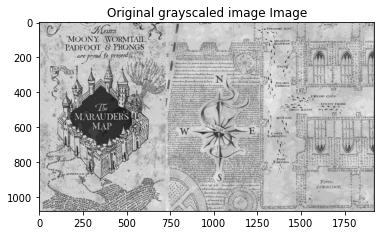

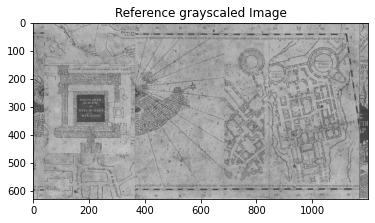

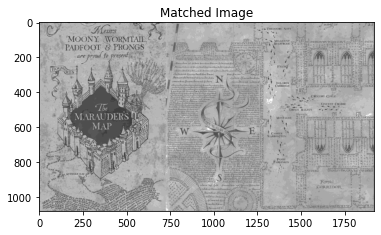

In [350]:
img1=Image()
img1.read_local_img('../images/map.jpeg')
my_l=Image()
my_l.img=cv2.cvtColor(img1.img, cv2.COLOR_BGR2GRAY)
plt.imshow(my_l.img,cmap='gray')
plt.title('Original grayscaled image Image')
plt.show()

img2=Image()
img2.read_local_img('../images/map-reference.jpeg')
my_l2=Image()
my_l2.img=cv2.cvtColor(img2.img, cv2.COLOR_BGR2GRAY)
plt.imshow(my_l2.img,cmap='gray')
plt.title('Reference grayscaled Image')
plt.show()


aa=histMatching(my_l.img,my_l2.img)
plt.imshow(aa,cmap='gray')
plt.title('Matched Image')
plt.show()


# Question8

part 1

In [351]:
def gamma_function(img,ga):
    c = np.power(255.0,1-ga)
    b = float(c) * img**(float(ga))
    b = np.uint8(b)
    return b


part 2

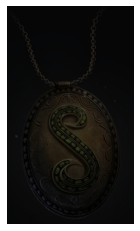

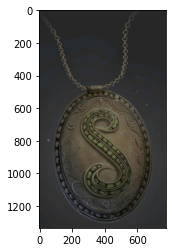

In [352]:
locket=Image()
locket.read_local_img('../images/locket.jpeg')
locket.print_img()

img1=gamma_function(locket.img,0.5)
plt.imshow(img1,cmap='gray')
plt.show()

part 3

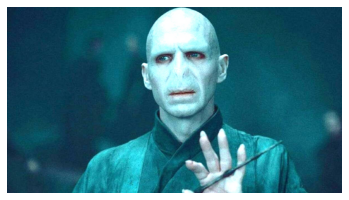

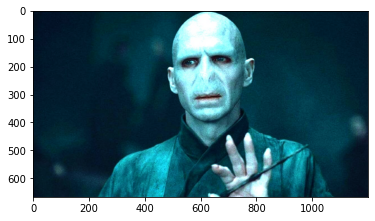

In [353]:
voldemort=Image()
voldemort.read_local_img('../images/voldemort.jpeg')
voldemort.print_img()

img2=gamma_function(voldemort.img,1.5)
plt.imshow(img2,cmap='gray')
plt.show()

# Question9

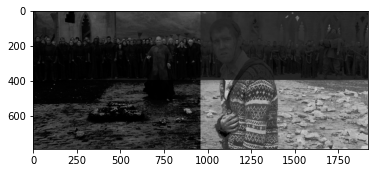

In [354]:
neville1=Image()
neville1.read_local_img('../images/neville1.jpg')

neville2=Image()
neville2.read_local_img('../images/neville2.jpg')

neville3=Image()
neville3.read_local_img('../images/neville3.jpg')

neville4=Image()
neville4.read_local_img('../images/neville4.jpg')

im_v1 = cv2.vconcat([neville1.img, neville2.img])
im_v2 = cv2.vconcat([neville3.img, neville4.img])
im_v = cv2.hconcat([im_v1, im_v2])
plt.imshow(im_v,cmap='gray')
plt.show()

iq1=Hist(neville1.img)
iq1.histEqaulization()
iq2=Hist(neville2.img)
iq2.histEqaulization()
iq3=Hist(neville3.img)
iq3.histEqaulization()
iq4=Hist(neville4.img)
iq4.histEqaulization()


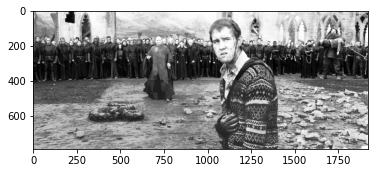

In [355]:

temp=gamma_function(iq2.img2,0.2)
temp=linear_tranform(temp,1,-70)
temp2=gamma_function(iq4.img,2)
temp2=linear_tranform(temp2,1,80)
temp3=gamma_function(iq3.img2,0.79)
im_v11 = cv2.vconcat([iq1.img2, temp])
im_v21 = cv2.vconcat([temp3, temp2])
im_v1 = cv2.hconcat([im_v11, im_v21])
final=Hist(im_v1)
final.histEqaulization()
plt.imshow(final.img2)
plt.show()